Enter total area:1100
Select if you want default or customized map: 
Enter 1 for default and 2 for customized: 1
Blocks remained post highways and centre is assigned:  100
Enter the percentages for different zones:
Dense Green (0-100): 6
Parks & Rec (0-100): 4
Residential (0-100): 33
Large Industries (0-100): 7
Medium Industries (0-100): 7
Cottage Industries (0-100): 6
Large Hospitals (0-100): 6
Clinics (0-100): 7
Commercial (0-100): 11
Airport (0-100): 2
Educational (0-100): 7
Water Bodies (0-100): 4
[[ 9. 11.  6. 15.  3.  3.  3.  3.  5.  5.  4.]
 [ 9.  3.  8. 15.  2.  3. 11.  3.  3.  3.  5.]
 [ 3.  3.  3. 15.  3. 11.  3. 11.  5.  4.  5.]
 [ 3.  9. 12. 15. 12.  3.  3.  8.  1.  1.  5.]
 [ 3.  3.  9. 15.  2.  8. 11.  6.  4.  5.  6.]
 [ 7.  9.  1. 15.  7.  9.  7.  1.  3.  4.  4.]
 [ 9.  3.  3. 15.  3. 12.  3.  4.  6.  1.  1.]
 [15. 15. 15. 16. 15. 15. 15. 15. 15. 15. 15.]
 [ 7.  3.  9. 15.  9. 10. 10.  3.  3.  8.  7.]
 [ 3.  8. 11. 15.  8. 11.  3.  9.  4.  3.  7.]
 [ 9.  2.  2. 15.  4. 1

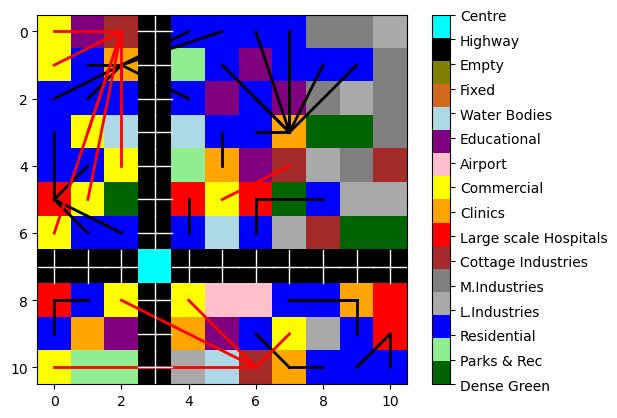

In [2]:
import numpy as np
import random
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import math

#calculate distance between two points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

#
def get_user_input(prompt, min_value, max_value):
    while True:
        try:
            value = float(input(prompt))
            if min_value <= value <= max_value:
                return value
            else:
                print(f"Please enter a value between {min_value} and {max_value}.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

            
#check if entered coordinate is valid/present in the grid            
def is_valid_coordinate(coord, grid_shape):
    x, y = coord
    return 0 <= x < grid_shape and 0 <= y < grid_shape

#Generate the grid with given constraints
def generate_zone_grid(area):
    grid_shape = int(area / 100)
    minimum_distance_to_large_industries = 3
    
    zones = {
        'Nothing': 0,
        'Dense Green': 1,
        'Parks & Rec': 2,
        'Residential': 3,
        'L.Industries': 4,
        'M.Industries': 5,
        'Cottage Industries': 6,
        'Large scale Hospitals': 7,
        'Clinics': 8,
        'Commercial': 9,
        'Airport': 10,
        'Educational': 11,
        'Water Bodies': 12,
        'Fixed':13,
        'Empty': 14,
        'Highway': 15,
        'Centre': 16
    }
    
    # Create a list of valid points
    valid_points = [(x, y) for x in range(1, grid_shape) for y in range(1, grid_shape)]
    
    #selecting map layout    
    print('Select if you want default or customized map: ')
    opt = int(input('Enter 1 for default and 2 for customized: '))
    fixed_blocks = []
    empty_blocks = []
    if opt == 1:
        grid = np.zeros((grid_shape, grid_shape))
    else:
        grid = np.zeros((grid_shape, grid_shape))
        block = int(input('Enter the number of blocks to be fixed: ')) 
        if block > 0:
            for i in range(block):
                while True:
                    coord = None
                    while coord is None:
                        coord_str = input(f'Enter coordinates (x,y) for block {i+1}: ')
                        if ',' in coord_str:
                            try:
                                x, y = map(int, coord_str.split(','))
                                coord = (x, y)
                            except ValueError:
                                print('Invalid input. Please enter coordinates in the format "x,y".')
                        else:
                            print('Invalid input. Please enter coordinates in the format "x,y".')

                    if is_valid_coordinate(coord, grid_shape):
                        fixed_blocks.append(coord)
                        break
                    else:
                        print(f'Invalid coordinates. Please enter coordinates within the range (0, 0) to ({grid_shape-1}, {grid_shape-1}).')

            for coord in fixed_blocks:
                x, y = coord
                grid[x][y] = 13
            
        block1 = int(input('Enter the number of blocks to be kept empty: '))
        if block1 > 0:
            opt1 = int(input('Enter 1 for random allocation and 2 for coordinate allocation: '))
            if opt1 == 1:
                for i in range(block1):
                    selected_point = random.choice(valid_points)
                    empty_blocks.append(selected_point)
            else:
                for i in range(block1):
                    while True:
                        coord = None
                        while coord is None:
                            coord_str = input(f'Enter coordinates (x,y) for block {i+1}: ')
                            if ',' in coord_str:
                                try:
                                    x, y = map(int, coord_str.split(','))
                                    coord = (x, y)
                                except ValueError:
                                    print('Invalid input. Please enter coordinates in the format "x,y".')
                            else:
                                print('Invalid input. Please enter coordinates in the format "x,y".')

                        if is_valid_coordinate(coord, grid_shape):
                            empty_blocks.append(coord)
                            break
                        else:
                            print(f'Invalid coordinates. Please enter coordinates within the range (0, 0) to ({grid_shape-1}, {grid_shape-1}).')

            for coord in empty_blocks:
                x, y = coord
                grid[x][y] = 14
                
    # Extract unique x and y coordinates from fixed_blocks and empty_blocks
    unique_x_coordinates = list(set(x for x, _ in fixed_blocks + empty_blocks))
    unique_y_coordinates = list(set(y for _, y in fixed_blocks + empty_blocks))
#----------------------------------------------------------------------------------------------------------------------- 

    cvalid_points = [(x, y) for x in range(1, grid_shape - 1) for y in range(1, grid_shape - 1) if (x not in unique_x_coordinates) and (y not in unique_y_coordinates)]
        
    # Select a random point from the valid points
    selected_point = random.choice(cvalid_points)

    # Set the selected point to "Parks & Rec"
    x_coord, y_coord = selected_point
    grid[x_coord, y_coord] = zones['Centre']

    # Create a path to the top border
    for x in range(x_coord, -1, -1):
        if grid[x, y_coord] != zones['Centre']:
            grid[x, y_coord] = zones['Highway']

    # Create a path to the bottom border
    for x in range(x_coord, grid_shape):
        if grid[x, y_coord] != zones['Centre']:
            grid[x, y_coord] = zones['Highway']

    # Create a path to the left border
    for y in range(y_coord, -1, -1):
        if grid[x_coord, y] != zones['Centre']:
            grid[x_coord, y] = zones['Highway']

    # Create a path to the right border
    for y in range(y_coord, grid_shape):
        if grid[x_coord, y] != zones['Centre']:
            grid[x_coord, y] = zones['Highway']

    # Calculate the initial remaining area ('Nothing')
    def calculate_remaining_area(grid):
        nothing_zone = 0
        total_area = grid.size
        remain_area = 0

        for row in grid:
            for cell in row:
                if cell == nothing_zone:
                    remain_area += 1

        return remain_area  # Assuming each cell represents 100 units of area

    remain_area = calculate_remaining_area(grid)
    print('Blocks remained post highways and centre is assigned: ',remain_area)

#--------------------------------------------------------------------------------------------------------------------
    #Get percentages for each zone
    zone_percent = {}

    while True:
        total_percentage = 0
        print("Enter the percentages for different zones:")

        zone_percent['Dense Green'] = get_user_input("Dense Green (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Dense Green']

        zone_percent['Parks & Rec'] = get_user_input("Parks & Rec (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Parks & Rec']

        zone_percent['Residential'] = get_user_input("Residential (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Residential']

        zone_percent['L.Industries'] = get_user_input("Large Industries (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['L.Industries']

        zone_percent['M.Industries'] = get_user_input("Medium Industries (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['M.Industries']

        zone_percent['Cottage Industries'] = get_user_input("Cottage Industries (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Cottage Industries']

        zone_percent['Large scale Hospitals'] = get_user_input("Large Hospitals (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Large scale Hospitals']

        zone_percent['Clinics'] = get_user_input("Clinics (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Clinics']

        zone_percent['Commercial'] = get_user_input("Commercial (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Commercial']

        zone_percent['Airport'] = get_user_input("Airport (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Airport']

        zone_percent['Educational'] = get_user_input("Educational (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Educational']

        zone_percent['Water Bodies'] = get_user_input("Water Bodies (0-100): ", 0, 100) / 100
        total_percentage += zone_percent['Water Bodies']

        if abs(total_percentage - 1.0) < 0.001:
            break
        else:
            print("Total percentage must be 1.0. Please re-enter the percentages.")

    #creating list for num of blocks for each zone
    num_dense, num_park, num_res, num_ind1, num_ind2, num_cot, num_hos, num_cli, num_com, num_air, num_edu, num_wb = [
        round(zone_percent[zone_type] * remain_area) for zone_type in zone_percent
    ]
    num_list = [num_dense, num_park, num_res, num_ind1, num_ind2, num_cot, num_hos, num_cli, num_com, num_air, num_edu, num_wb]
       
   
    num_hos_placed, num_cli_placed, num_edu_placed, num_res_placed, num_park_placed, num_com_placed, num_ind1_placed, num_ind2_placed, num_dense_placed, num_cot_placed, num_air_placed, num_wb_placed = [0] * 12

    #Industries placement ---------------------------------------------------------------------------------------
    farthest_point = None
    max_distance = -1
    center_zone_coords = np.argwhere(grid == 16)[0]  # Use 16 for 'Centre'
    center_x, center_y = center_zone_coords
    
    
    #Finding the farthest point from the city centre
    for x, y in np.argwhere(grid == 0):
        distance = calculate_distance(center_x, center_y, x, y)
        if distance > max_distance:
            max_distance = distance
            farthest_point = (x, y)
    x_far, y_far = farthest_point
    grid[x_far, y_far] = zones['L.Industries']

    # Define a function to check if a point is valid for placement
    def is_valid(x, y):
        return 0 <= x < grid_shape and 0 <= y < grid_shape and grid[x, y] == 0

    # Define a function to find a valid neighbor
    def find_valid_neighbor(x, y):
        neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
        valid_neighbors = [(nx, ny) for nx, ny in neighbors if is_valid(nx, ny)]
        return valid_neighbors

    # Place 'Large Industries', 'Medium Industries', and 'Dense Green' zones around the corner
    remaining_iterations = num_ind1 + num_ind2 + num_dense + num_cot
    while remaining_iterations > 0:
        neighbors = find_valid_neighbor(x_far, y_far)

        if neighbors:
            selected_zone = random.choice(['L.Industries', 'M.Industries', 'Dense Green', 'Cottage Industries'])

            if selected_zone == 'L.Industries' and num_ind1_placed < num_ind1:
                neighbor_x, neighbor_y = random.choice(neighbors)
                grid[neighbor_x, neighbor_y] = zones[selected_zone]
                x_far, y_far = random.choice(neighbors)
                num_ind1_placed += 1
                remaining_iterations -= 1
            elif selected_zone == 'M.Industries' and num_ind2_placed < num_ind2:
                neighbor_x, neighbor_y = random.choice(neighbors)
                grid[neighbor_x, neighbor_y] = zones[selected_zone]
                x_far, y_far = random.choice(neighbors)
                num_ind2_placed += 1
                remaining_iterations -= 1
            elif selected_zone == 'Cottage Industries' and num_cot_placed < num_cot:
                neighbor_x, neighbor_y = random.choice(neighbors)
                grid[neighbor_x, neighbor_y] = zones[selected_zone]
                x_far, y_far = random.choice(neighbors)
                num_cot_placed += 1
                remaining_iterations -= 1
            elif selected_zone == 'Dense Green' and num_dense_placed < num_dense:
                neighbor_x, neighbor_y = random.choice(neighbors)
                grid[neighbor_x, neighbor_y] = zones[selected_zone]
                x_far, y_far = random.choice(neighbors)
                num_dense_placed += 1
                remaining_iterations -= 1
            else:
                continue
        else:
            # No valid neighbors left, break the loop
            break

     #Hospitals,clinics, edu, commercial---------------------------------------------------------------------
    total_points = num_hos + num_cli + num_edu + num_com + num_air + num_wb +num_park
    nothing_zones = np.argwhere(grid == 0)

    Air_list = []
    while total_points > 0 and len(nothing_zones) > 0:
        choice = random.choice(nothing_zones)
        x, y = choice
        selected = random.choice(['Commercial', 'Large scale Hospitals', 'Clinics', 'Educational','Airport','Water Bodies','Parks & Rec'])

        if selected == 'Commercial' and num_com_placed < num_com:
            grid[x, y] = zones[selected]
            num_com_placed += 1
            total_points -= 1
        elif selected == 'Large scale Hospitals' and num_hos_placed < num_hos:
            grid[x, y] = zones[selected]
            num_hos_placed += 1
            total_points -= 1
        elif selected == 'Clinics' and num_cli_placed < num_cli:
            grid[x, y] = zones[selected]
            num_cli_placed += 1
            total_points -= 1
        elif selected == 'Educational' and num_edu_placed < num_edu:
            grid[x, y] = zones[selected]
            num_edu_placed += 1
            total_points -= 1
        elif selected == 'Airport' and num_air_placed < num_air:
            grid[x, y] = zones[selected]
            Air_list.append(choice) 
            num_air_placed += 1
            total_points -= 1
        elif selected == 'Water Bodies' and num_wb_placed < num_wb:
            grid[x, y] = zones[selected]
            num_wb_placed += 1
            total_points -= 1
        elif selected == 'Parks & Rec' and num_park_placed < num_park:
            grid[x, y] = zones[selected]
            num_park_placed += 1
            total_points -= 1
        else:
            continue

        # Update the list of empty zones
        nothing_zones = np.argwhere(grid == 0)

    #residential and parks------------------------------------------------------------------------------------

    while num_res_placed < num_res:
            nothing_zones = np.argwhere(grid == 0)
            if len(nothing_zones) == 0:
                break
            num_res_placed += 1

            # Create a list of residential clusters
            residential_clusters = []
            for x in range(grid_shape):
                for y in range(grid_shape):
                    if grid[x, y] == zones['Residential']:
                        residential_clusters.append((x, y))

            # Check if there are any existing residential zones
            if residential_clusters:
                # Find the cluster with the most existing residential zones
                largest_cluster = max(residential_clusters, key=lambda cluster: len([p for p in residential_clusters if calculate_distance(p[0], p[1], cluster[0], cluster[1]) <= 1]))

                # Check if there are available points in nothing_zones
                available_points = [p for p in nothing_zones if calculate_distance(p[0], p[1], largest_cluster[0], largest_cluster[1]) <= 1]

                if available_points:
                    # Select a random point from the largest cluster
                    selected_zone = random.choice(available_points)
                else:
                    # If there are no available points, select a completely random point
                    selected_zone = random.choice(nothing_zones)
            else:
                # If there are no existing residential zones, select a completely random point
                selected_zone = random.choice(nothing_zones)

            x, y = selected_zone
            grid[x, y] = zones['Residential']

            # Randomly allocate neighboring zones
            neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
            for neighbor in neighbors:
                neighbor_x, neighbor_y = neighbor
                if 0 <= neighbor_x < grid_shape and 0 <= neighbor_y < grid_shape and grid[neighbor_x, neighbor_y] == 0:
                    # Check the distance to "Large Industries" zones
                    too_close_to_large_industries = False
                    for li_x, li_y in np.argwhere(grid == zones['L.Industries']):
                        distance_to_large_industries = calculate_distance(neighbor_x, neighbor_y, li_x, li_y)
                        if distance_to_large_industries < minimum_distance_to_large_industries:
                            too_close_to_large_industries = True
                            break

    zone_types = [
        ('Dense Green', num_dense,num_dense_placed),
        ('Parks & Rec', num_park,num_park_placed),
        ('Residential', num_res,num_res_placed),
        ('L.Industries', num_ind1,num_ind1_placed),
        ('M.Industries', num_ind2,num_ind2_placed),
        ('Cottage Industries', num_cot,num_cot_placed),
        ('Large scale Hospitals', num_hos,num_hos_placed),
        ('Clinics', num_cli,num_cli_placed),
        ('Educational', num_edu,num_edu_placed),
        ('Airport', num_air,num_air_placed),
        ('Water Bodies', num_wb,num_wb_placed),
        ('Commercial', num_com,num_com_placed),
    ]

    # Place zones on the grid
    for zone_type, num_zones,num_zones_placed in zone_types:
        nothing_zones = np.argwhere(grid == 0)
        while num_zones_placed < num_zones and len(nothing_zones) > 0:
            selected_zone = random.choice(nothing_zones)
            x, y = selected_zone
            grid[x, y] = zones[zone_type]
            nothing_zones = np.argwhere(grid == 0)
            num_zones_placed +=1

    
    return grid,num_list

    

area = int(input('Enter total area:'))
zones = {}
grid,num_list = generate_zone_grid(area)
print(grid)

colors = ['darkgreen', 'lightgreen', 'blue', 'darkgrey', 'grey', 'brown', 'red', 'orange', 'yellow', 'pink', 'purple', 'lightblue', 'chocolate', 'olive', 'black', 'cyan']

# Create a colormap for the zones
cmap = ListedColormap(colors)

# Create a figure and axis for the map
fig, ax = plt.subplots()

# Display the grid as an image with colors based on zones
ax.imshow(grid, cmap=cmap)

# Add a colorbar for reference
cbar = plt.colorbar(ax.imshow(grid, cmap=cmap), ax=ax, ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16])  # Adjust ticks for Healthcare
cbar.set_ticklabels(
    ['Dense Green', 'Parks & Rec', 'Residential', 'L.Industries', 'M.Industries', 'Cottage Industries',
     'Large scale Hospitals', 'Clinics', 'Commercial', 'Airport', 'Educational', 'Water Bodies', 'Fixed', 'Empty','Highway', 'Centre'])


residential_coords = np.argwhere(grid == 3)
hospital_coords = np.argwhere(np.logical_or(grid == 7, grid == 8))  # Both hospitals and clinics

# Create a dictionary to store the closest healthcare facility for each residential zone
closest_healthcare = {}

# Iterate through each residential zone
for res_coord in residential_coords:
    res_x, res_y = res_coord
    min_distance = float('inf')
    closest_hospital = None

    # Iterate through each healthcare facility to find the closest one
    for health_coord in hospital_coords:
        health_x, health_y = health_coord
        distance = calculate_distance(res_x, res_y, health_x, health_y)

        if distance < min_distance:
            min_distance = distance
            closest_hospital = (health_x, health_y)

    closest_healthcare[(res_x, res_y)] = closest_hospital


# Draw lines from each residential zone to its closest healthcare facility
for res_coord, closest_healthcare_coord in closest_healthcare.items():
    x_values = [res_coord[1], closest_healthcare_coord[1]]
    y_values = [res_coord[0], closest_healthcare_coord[0]]
    ax.plot(x_values, y_values, color='black', linestyle='-', linewidth=2)
   
 # ---------------------------------------------------------------------------------------------------------------------------------
commercial_coords = np.argwhere(grid == 9)
industry_coords = np.argwhere(np.logical_or(grid == 5, grid == 6,grid ==7))  

# Create a dictionary to store the closest healthcare facility for each residential zone
closest_industries = {}

# Iterate through each residential zone
for com_coord in commercial_coords:
    com_x, com_y = com_coord
    min_distance = float('inf')
    closest_industry = None

    # Iterate through each healthcare facility to find the closest one
    for ind_coord in industry_coords:
        ind_x, ind_y = ind_coord
        distance = calculate_distance(com_x, com_y, ind_x, ind_y)

        if distance < min_distance:
            min_distance = distance
            closest_industry = (ind_x, ind_y)

    closest_industries[(com_x, com_y)] = closest_industry

# Display the grid as an image with colors based on zones
# Draw lines from each residential zone to its closest healthcare facility
for com_coord, closest_industries_coord in closest_industries.items():
    x_values = [com_coord[1], closest_industries_coord[1]]
    y_values = [com_coord[0], closest_industries_coord[0]]
    ax.plot(x_values, y_values, color='red', linestyle='-', linewidth=2)

#------------------------------------------------------------------------------------------------------------------------

for highway_coord in np.argwhere(grid == 15):  # Change to 15 for Highway
    highway_x, highway_y = highway_coord
    ax.plot([highway_y+0.5, highway_y-0.5], [highway_x, highway_x ], color='white', linewidth=1)
    ax.plot([highway_y , highway_y ], [highway_x + 0.5, highway_x - 0.5], color='white', linewidth=1)
   


 #  Show the plot
    
plt.show()

In [3]:
unique_values, counts = np.unique(grid, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

1.0 occurs 6 times
2.0 occurs 4 times
3.0 occurs 33 times
4.0 occurs 8 times
5.0 occurs 7 times
6.0 occurs 5 times
7.0 occurs 6 times
8.0 occurs 7 times
9.0 occurs 11 times
10.0 occurs 2 times
11.0 occurs 7 times
12.0 occurs 4 times
15.0 occurs 20 times
16.0 occurs 1 times


In [4]:
#checking number of blocks assigned and number of blocks placed
error = 0
for i in range(len(num_list)):
    error = error + abs(num_list[i]-counts[i])
acc = (100-error)/100
print("accuracy is: ",acc)

accuracy is:  0.98
